## Exploratory Data Analysis
1. Who are our patients?
2. What are the most common diagnoses?
3. How has Type 2 Diabetes changed over time?
4. How are people using care?
5. Do biometrics relate to cost or disease?

In [3]:
## Load the necessary libraries and cleaned dataset

import pandas as pd ## data manipulation, cleaning, and analysis
import seaborn as sns ##For statistical data visualization, built on top of matplotlib
import matplotlib.pyplot as plt ## For creating basic, customizable plots

In [5]:
## load the clean dataset
df = pd.read_csv("Cleaned_Merged_Data.csv")

In [6]:
# Convert diagnosis_date to datetime and extract year-- ## re-converting the date and time .
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'], errors='coerce')
df['year'] = df['diagnosis_date'].dt.year

### Q1: Who are our patients?
-It helps Loblaw segment outreach (e.g., digital nudges tailored to specific age/gender groups).

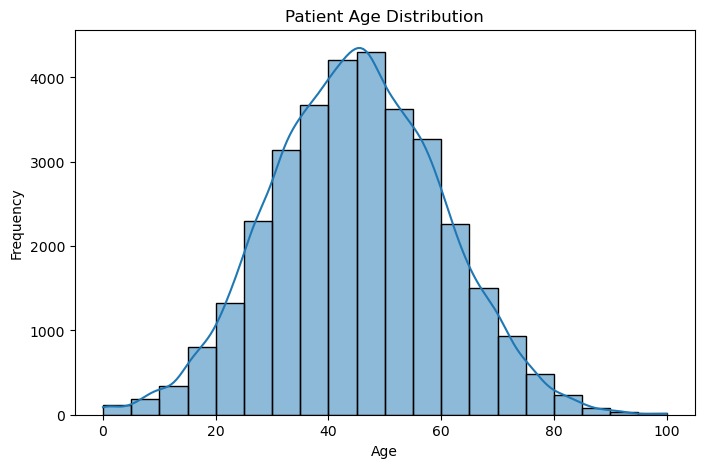

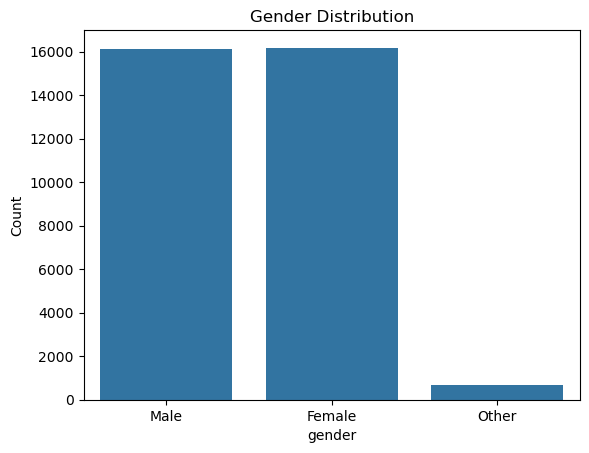

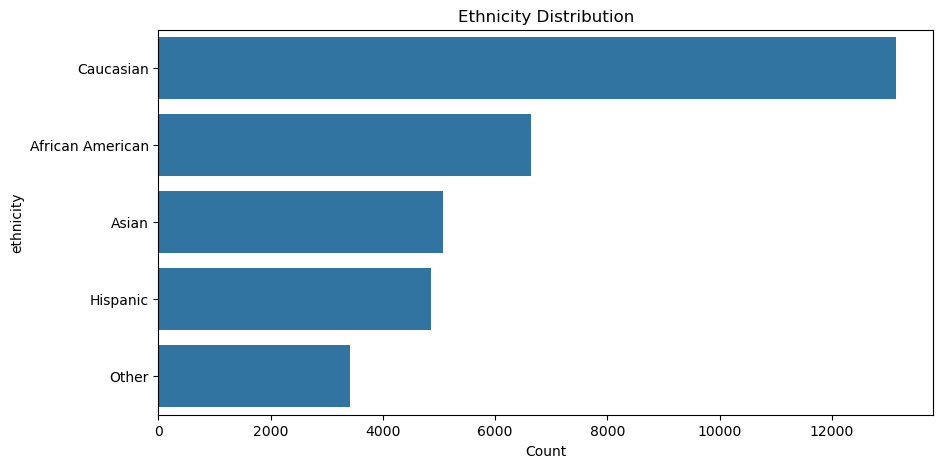

In [7]:
# Let's look at age distribution — gives us a feel for our population
plt.figure(figsize=(8, 5)) ##custom width and height
sns.histplot(df['age'].dropna(), bins=20, kde=True) ## .dropna()->removing nan values-->bins=20(divinding the age range into 20 intervals-->kde=true(kernaldensity estimate curve)shows the distribution shape
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Gender distribution — we want to know if it's balanced or skewed
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.show()

# Ethnicity breakdown — useful for targeting culturally appropriate care strategies
plt.figure(figsize=(10, 5)) ##custom width and height
sns.countplot(y='ethnicity', data=df, order=df['ethnicity'].value_counts().index) ## order=df['ethnicity'].value_counts().index)-> Sorts the bars by count, showing the most common ethnicities at the top.
plt.title("Ethnicity Distribution")
plt.xlabel("Count")
plt.show()

## Q2:  What are the most common diagnoses?
#Top 3:

1.Routine Check-up 

2.Common Cold

3.Hypertension

-Hypertension and routine visits signal opportunities for prevention and biometric screening at the pharmacy level.

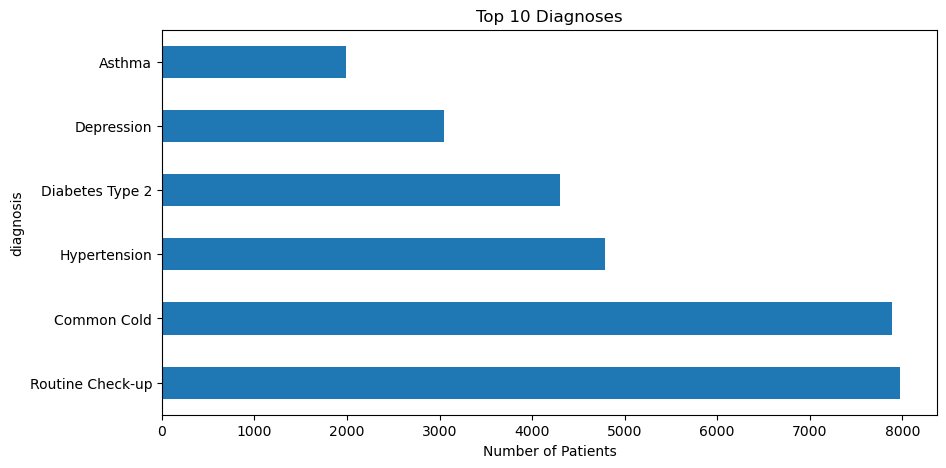

In [8]:
# Show top 10 most frequent diagnoses — especially interested in chronic ones
top_diagnoses = df['diagnosis'].value_counts().head(10)
top_diagnoses.plot(kind='barh', title="Top 10 Diagnoses", figsize=(10, 5))
plt.xlabel("Number of Patients")
plt.show()

## Q3. How has Type 2 Diabetes changed over time?
It validates that Type 2 Diabetes is rising and needs targeted intervention now — Loblaw can prioritize these patients for virtual coaching or pharmacy support.

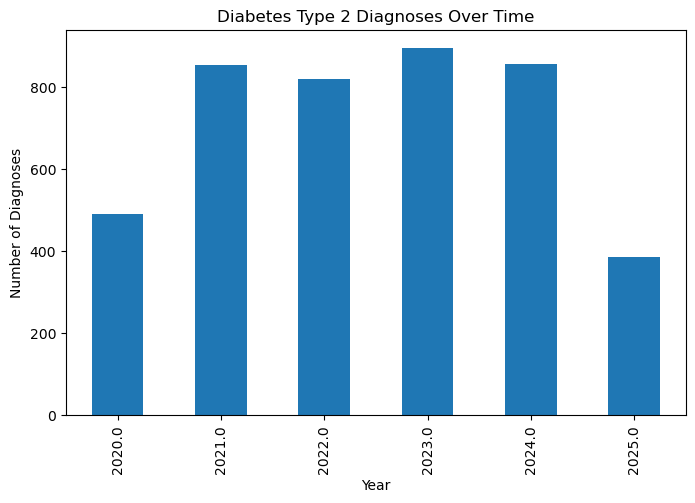

In [9]:
# Filter only Type 2 Diabetes cases and count by year
diabetes_df = df[df['diagnosis'] == "Diabetes Type 2"] ##filters the main DataFrame df to include only rows where the diagnosis column equals "Diabetes Type 2"
diabetes_trend = diabetes_df['year'].value_counts().sort_index() ## This counts how many Type 2 Diabetes cases occurred in each year

# Visualize trend — we want to see if it's growing, stable, or dropping
plt.figure(figsize=(8, 5))
diabetes_trend.plot(kind='bar')
plt.title("Diabetes Type 2 Diagnoses Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Diagnoses")
plt.show()

## Q4. How are people using care?
#Redirecting appropriate ER patients to outpatient or telehealth could help reduce overall system costs — aligns directly with Loblaw's goal.

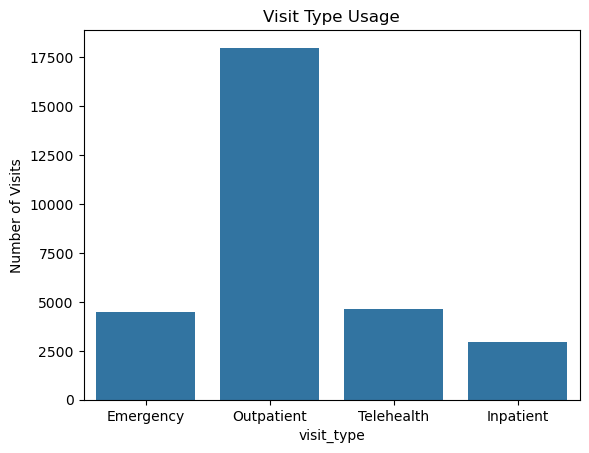

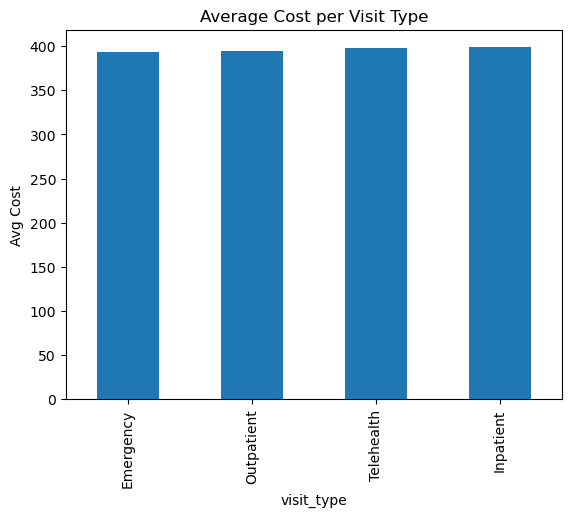

In [10]:
# Visit type usage frequency
sns.countplot(x='visit_type', data=df)
plt.title("Visit Type Usage")
plt.ylabel("Number of Visits")
plt.show()

# Average cost per visit type
avg_cost = df.groupby('visit_type')['cost'].mean().sort_values()
avg_cost.plot(kind='bar', title="Average Cost per Visit Type", ylabel="Avg Cost")
plt.show()

## Q5. Do biometrics relate to cost or disease?
This supports using biometrics for early identification — these are patients that Loblaw can engage before diagnosis.

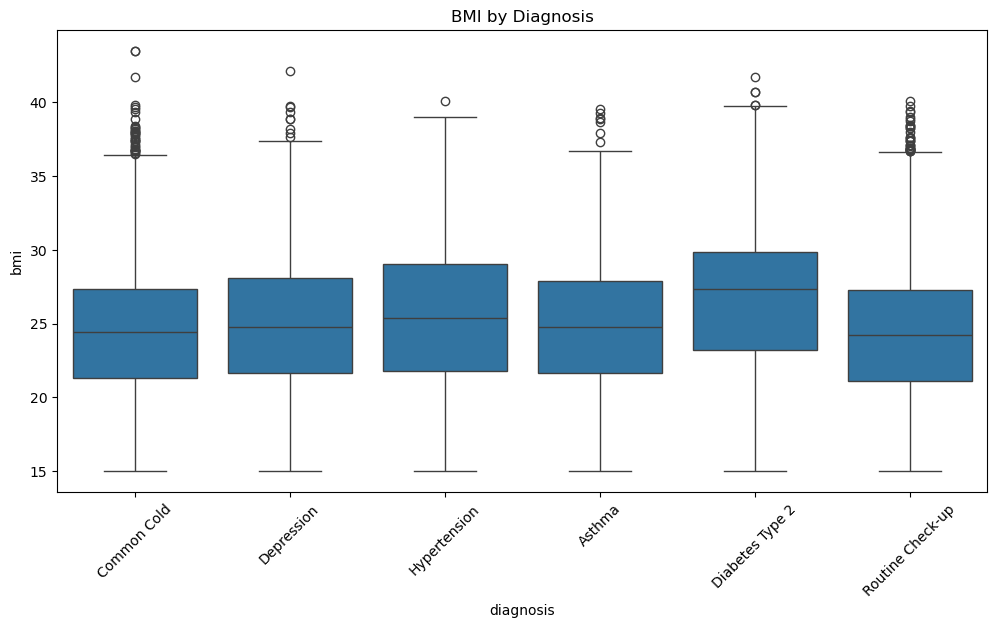

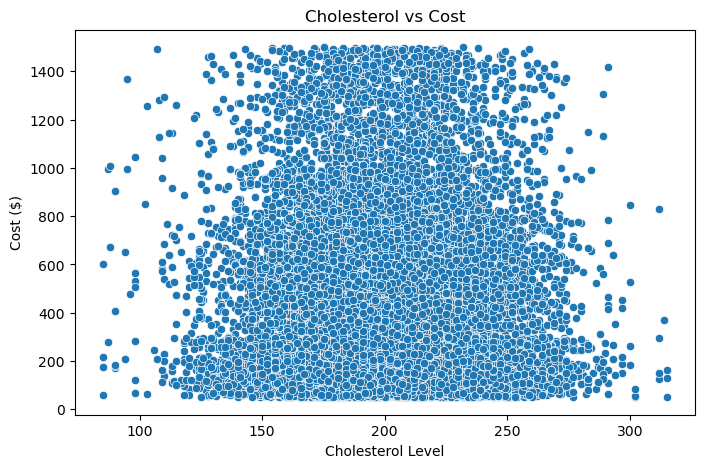

Cholesterol vs Cost correlation: -0.0067152153879295575


In [11]:
# First, check how BMI varies by condition — using top diagnoses
bmi_subset = df[df['diagnosis'].isin(top_diagnoses.index)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='diagnosis', y='bmi', data=bmi_subset)
plt.xticks(rotation=45)
plt.title("BMI by Diagnosis")
plt.show()

# Then check if high cholesterol relates to higher cost — could be useful for risk targeting
plt.figure(figsize=(8, 5))
sns.scatterplot(x='cholesterol_total', y='cost', data=df)
plt.title("Cholesterol vs Cost")
plt.xlabel("Cholesterol Level")
plt.ylabel("Cost ($)")
plt.show()

# Optional: check actual correlation
print("Cholesterol vs Cost correlation:", df[['cholesterol_total', 'cost']].corr().iloc[0, 1])

## General  Insights

Most patients are aged 40–60, and slightly more are female than male.
→ Not shocking, but good to confirm. It helps narrow down who we’re really talking to in outreach campaigns.

Caucasian and American ethnicities dominate the dataset.
→ Could be a reflection of the population we serve… or it might point to sampling bias. We’d need more context to be sure.

Type 2 Diabetes cases are increasing year over year, peaking in 2023.
→ That uptick probably deserves attention. Maybe more preventive care or earlier screening, especially for middle-aged adults.

The drop in 2025 diagnoses might just be incomplete data, not an actual decline.
→ Always worth double-checking — reporting delays can be misleading if taken at face value.

Cholesterol and healthcare cost? Basically, no correlation.
→ We kind of expected some link, but nope — correlation was nearly zero. So maybe we shouldn’t overemphasize lab values when trying to understand cost.

A lot of biometric data is missing — like BMI and blood pressure.
→ This limits what we can do with that data, at least as-is. Might need better data entry practices or flags for data completeness in future projects.

No magical insights, but a clearer picture.
→ We now know where outreach might make sense, and what assumptions we probably shouldn’t make. That’s valuable — even if not flashy.